# Pierwszy Kamień Milowy: Exploratory Data Analysis (EDA)
## Stellar Classification Dataset - SDSS17
https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

## Context
In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

## Content
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS\
alpha = Right Ascension angle (at J2000 epoch)\
delta = Declination angle (at J2000 epoch)\
u = Ultraviolet filter in the photometric system\
g = Green filter in the photometric system\
r = Red filter in the photometric system\
i = Near Infrared filter in the photometric system\
z = Infrared filter in the photometric system\
run_ID = Run Number used to identify the specific scan\
rereun_ID = Rerun Number to specify how the image was processed\
cam_col = Camera column to identify the scanline within the run\
field_ID = Field number to identify each field\
spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)\
class = object class (galaxy, star or quasar object)\
redshift = redshift value based on the increase in wavelength\
plate = plate ID, identifies each plate in SDSS\
MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken\
fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation\

#### Citation
fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.
Acknowledgements
The data released by the SDSS is under public domain. Its taken from the current data release RD17.
More information about the license: http://www.sdss.org/science/image-gallery/

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn 
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed = 42

In [27]:
df = pd.read_csv('C:\\Users\\HP\\Downloads\\archive\\star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

w ramce danych jest 100 000 wierszy oraz 18 kolumn, z czego wszyskie (poza zmienną class) są ilościowe

In [29]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

nie ma braków danych w żadnej kolumnie
##### przyjrzyjmy się teraz unikalnym wartościom

In [30]:
#ilość unikalnych wartości w każdej kolumnie
df.nunique()
### rerun id do usunięcia -> tylko jedna wartość

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64

kolumna rerun_ID przyjmuje tylko jedną wartość (301), czyli nie ma ona żadnego wpływu na klasę obiektów

In [31]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


przyjrzyjmy się kolumnie class:

In [32]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

<BarContainer object of 3 artists>

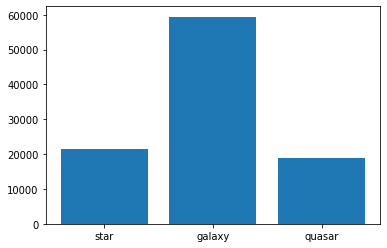

In [33]:
class_star = df[df['class'] == 'STAR']
class_galaxy = df[df['class'] == 'GALAXY']
class_quasar = df[df['class'] == 'QSO']

rows = [len(class_star), len(class_galaxy), len(class_quasar)]
names = ['star', 'galaxy', 'quasar']

plt.bar(names, rows)

#### zmienna class posiada trzy unikalne wartości: star, galaxy i quasar, z czego obiektów typu galaxy jest trzy razy więcej niż tyou star i trzy razy więcej niż typu quasar


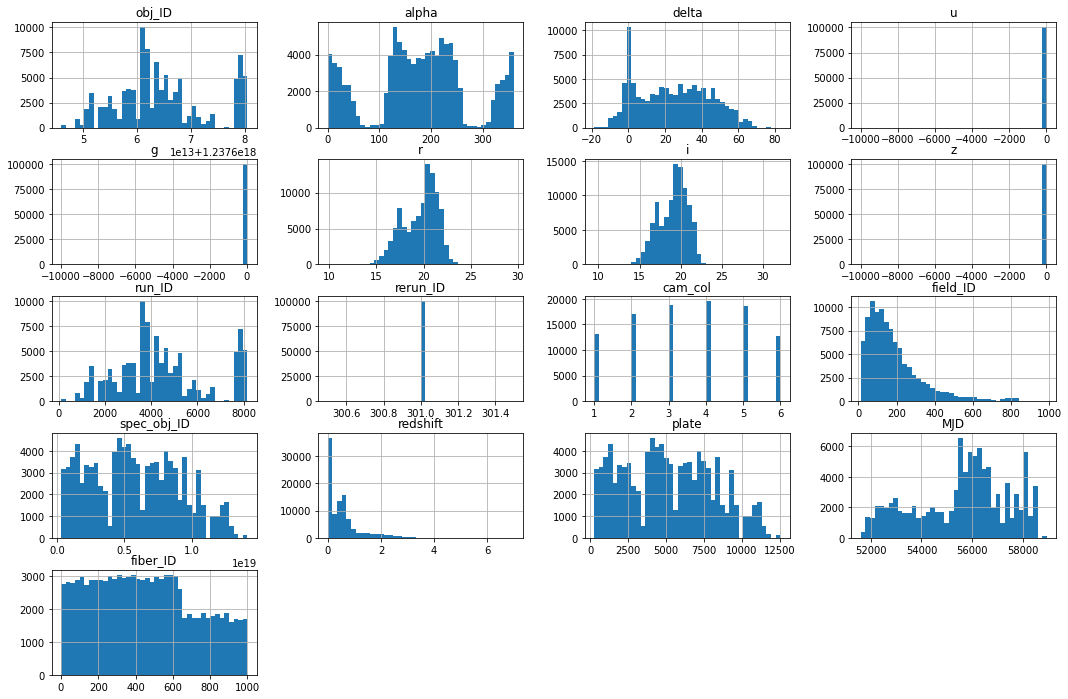

In [94]:
df.hist(bins = 40, figsize=(18, 12))
plt.show()

przyjrzyjmy się zmiennym u, g, z. z wykresów oraz z opisu powyżej można wywnioskować, że istnieje wiersz z bardzo odstającymi wartościami

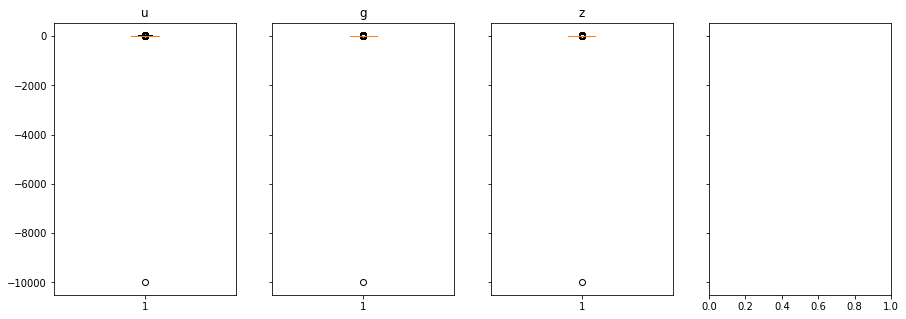

In [34]:
## boxploty dla zmiennych u, g, z, rerun_ID
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axs[0].boxplot(df["u"])
axs[0].set_title('u')

axs[1].boxplot(df['g'])
axs[1].set_title('g')

axs[2].boxplot(df['z'])
axs[2].set_title('z')


jest jedna wartość bardzo odstająca od reszty -> z wartością w kolumnach u, g, z wynoszącą -10 000 -> usuńmy ten wiersz

In [35]:
### jeden outlier, psuje wszystko -> do usunięcia!!!
df = df[df['u'] > 0]

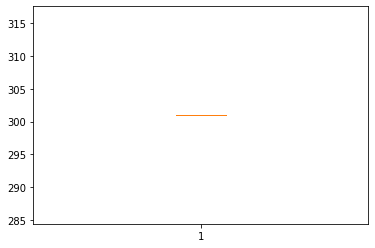

In [36]:
plt.boxplot(df['rerun_ID'])
plt.show()

Text(0.5, 1.0, 'z')

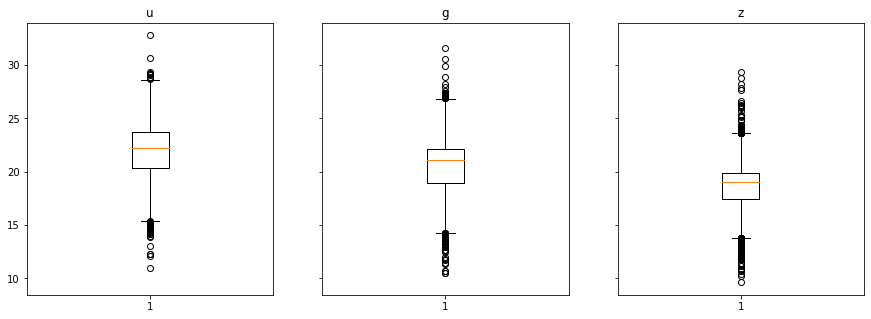

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axs[0].boxplot(df["u"])
axs[0].set_title('u')

axs[1].boxplot(df['g'])
axs[1].set_title('g')

axs[2].boxplot(df['z'])
axs[2].set_title('z')

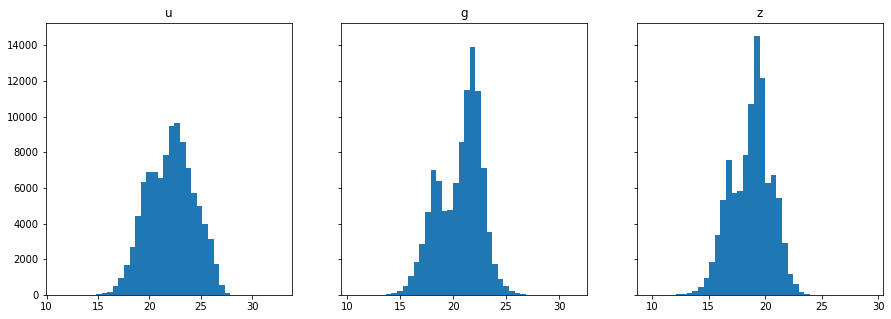

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axs[0].hist(df["u"], bins = 40)
axs[0].set_title('u')

axs[1].hist(df['g'], bins = 40)
axs[1].set_title('g')

axs[2].hist(df['z'], bins = 40)
axs[2].set_title('z')
plt.show()

po usunięciu outliera dopiero widać, że powyższe zmienne mają rozkład normalny

sprawdźmy teraz które zmienne korelują ze sobą:

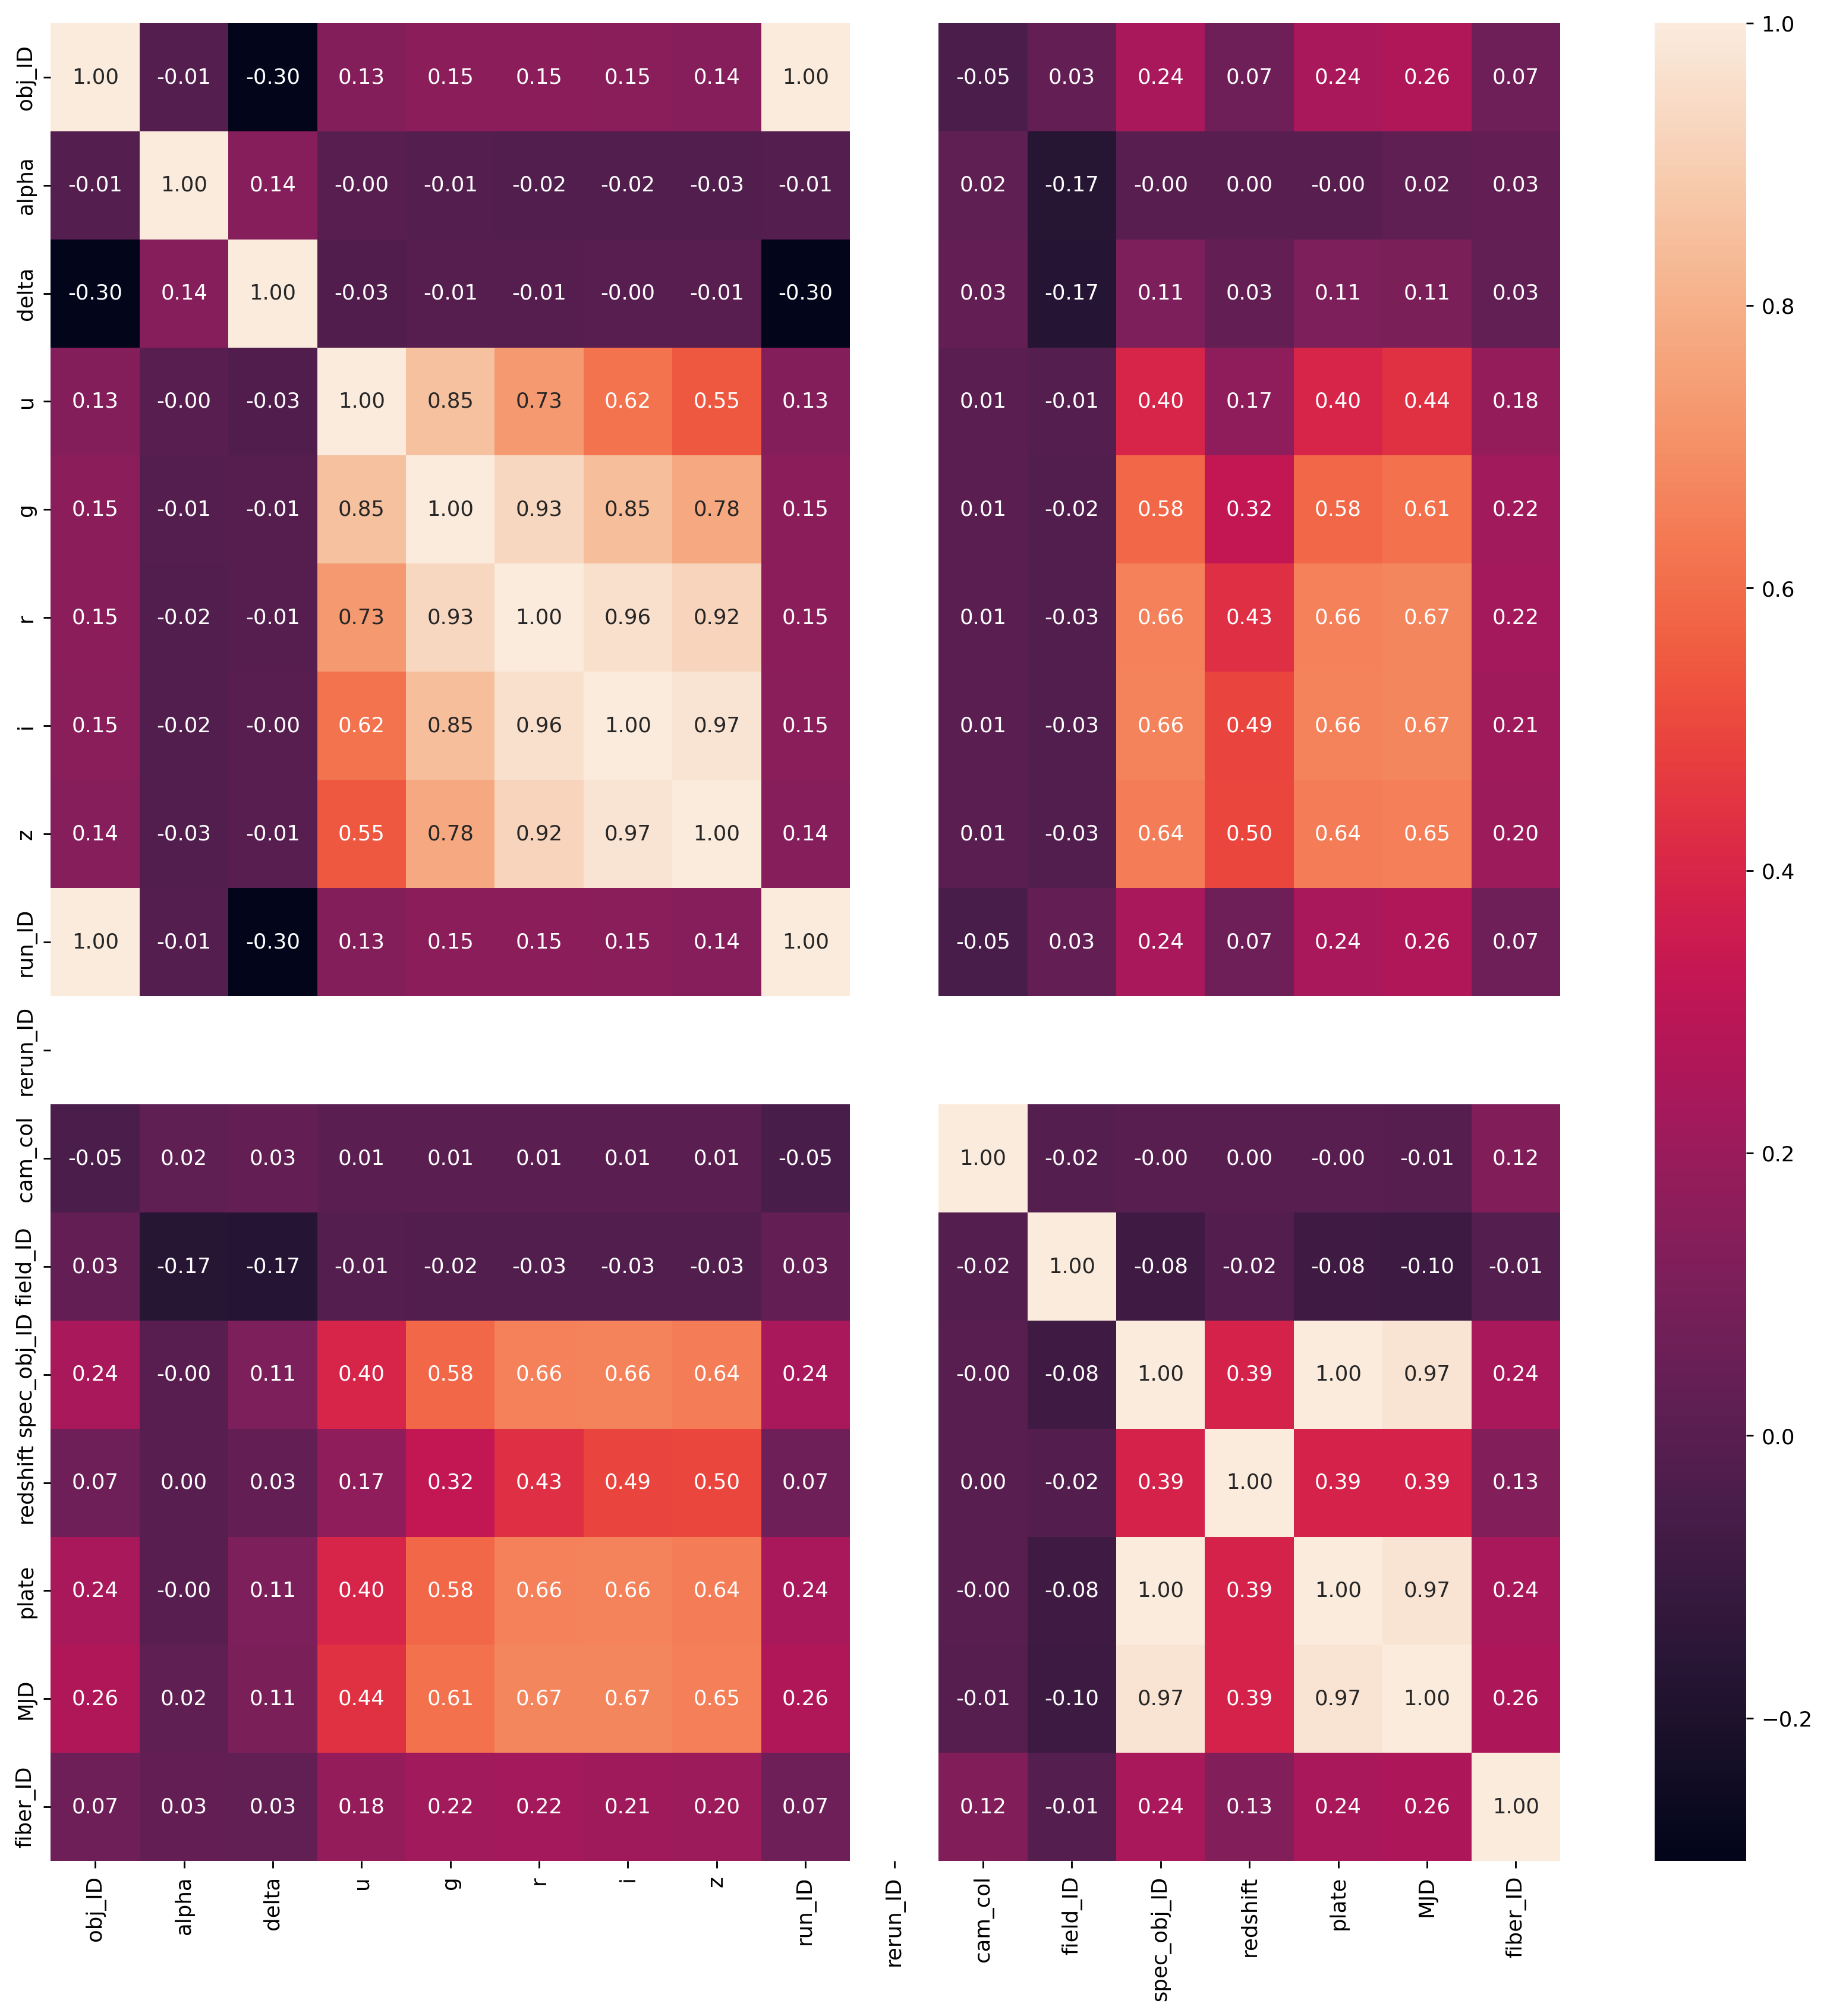

In [38]:
fig = plt.figure(figsize=(16,16), dpi = 256)
sns.heatmap(df.corr(), annot = True, fmt = '.2f')
plt.show()

zmienne obj_ID oraz run_ID mają korelację wynoszącą 1. zmienne silnie skorelowane muszą zostać usunięte (jedna wybrana)

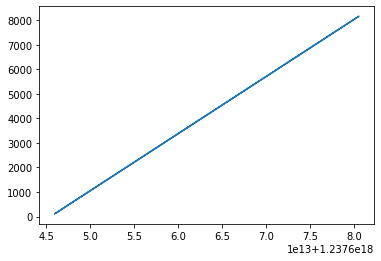

In [39]:
plt.plot(df['obj_ID'], df['run_ID'])
df.drop('run_ID', axis=1, inplace=True)

równie silna korelacja występuje dla kolumn spec_obj_ID oraz plate

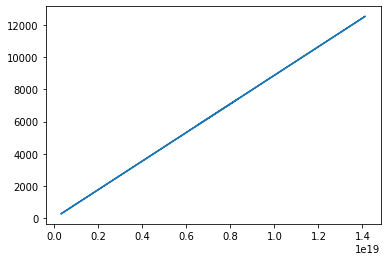

In [40]:
plt.plot(df['spec_obj_ID'], df['plate'])  ### jedna z tych zmiennych też do usunięcia

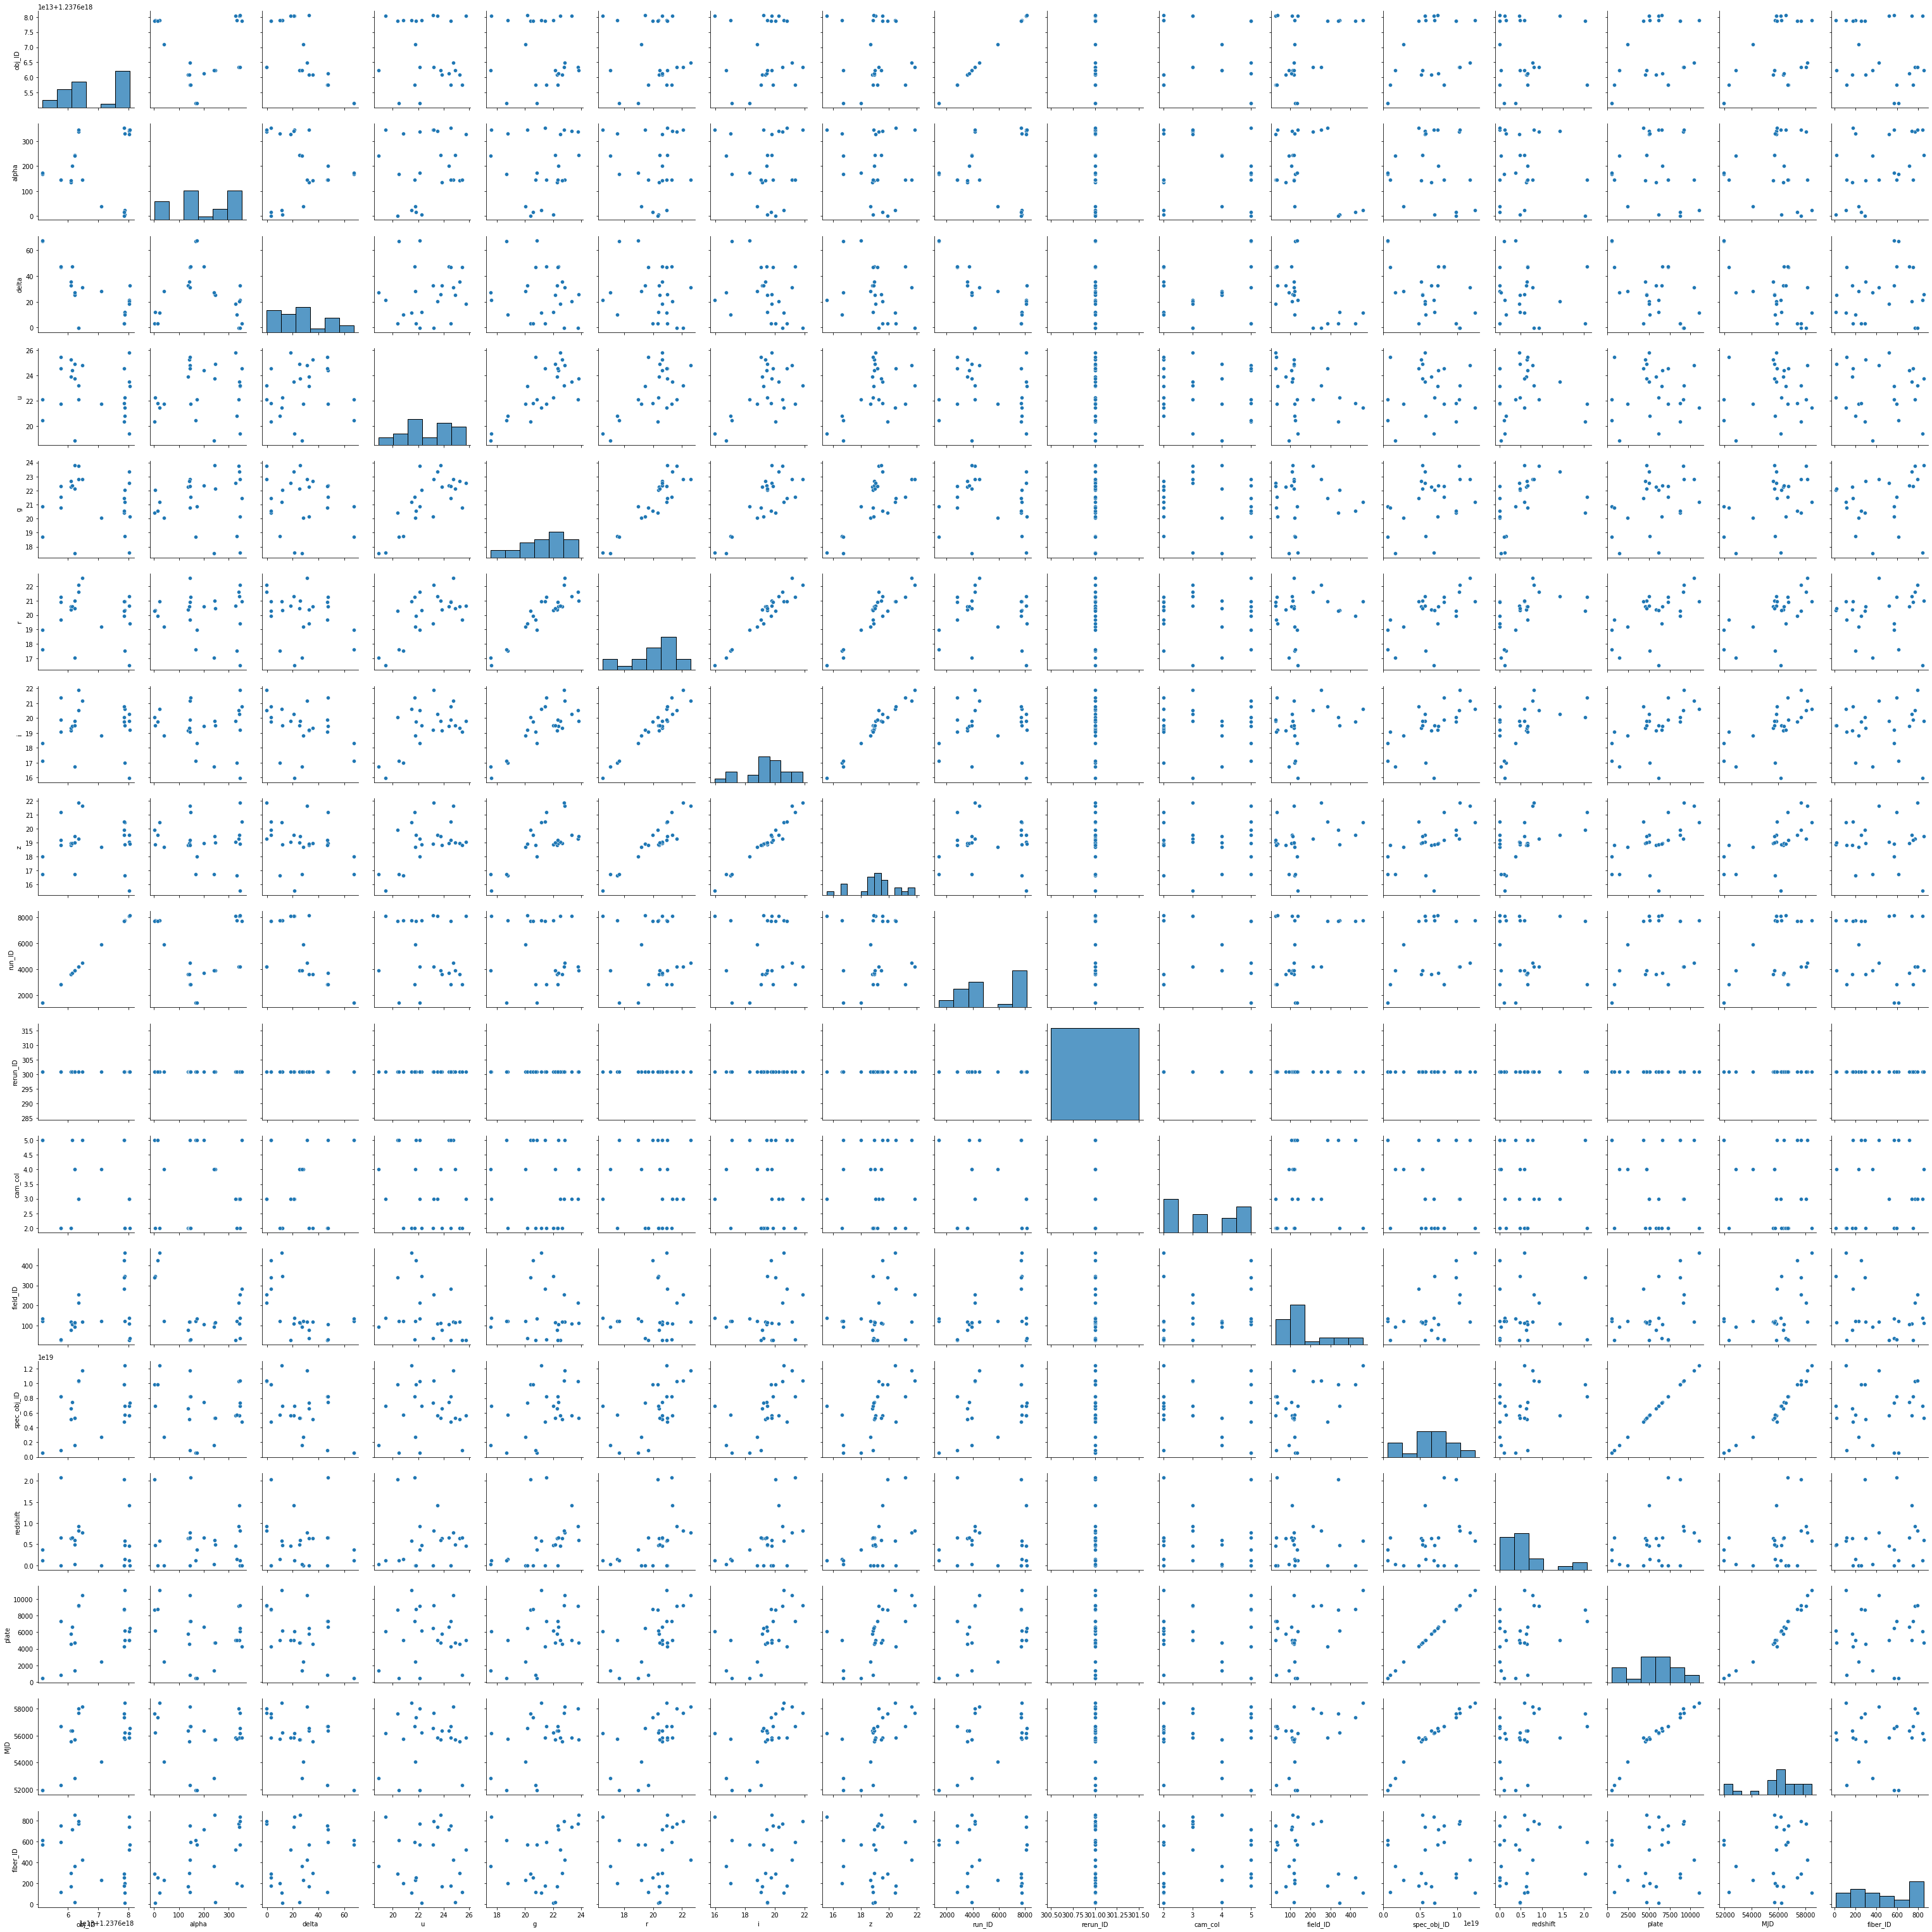

In [62]:
sns.pairplot(df.iloc[0:25,:])
plt.tight_layout()

<BarContainer object of 17 artists>

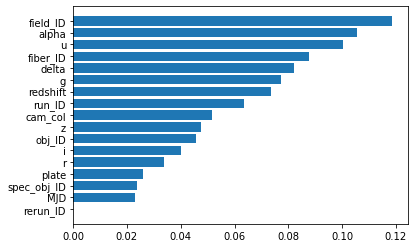

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

tmp_df = df.drop('class', axis=1).iloc[0:100,:]
X_train, y_train = train_test_split(tmp_df, test_size=0.5, random_state=42)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(tmp_df.columns[sorted_idx], rf.feature_importances_[sorted_idx])

<BarContainer object of 17 artists>

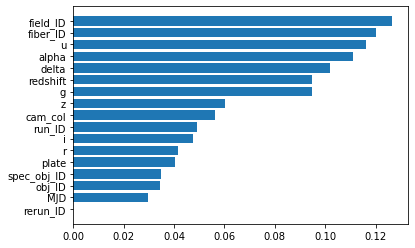

In [103]:
perm_importance = permutation_importance(rf, X_train, y_train)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(tmp_df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])

## alpha i delta

spójrzmy na zmienne alpha i delta. ostatni wykres w rzędzie to histogram dla wszystkich wierszy, bez podziału na klasy. Widzimy, że zmienna alpha przyjmuje bardzo mało wartości w przedziałach 60 - 100 oraz 250 - 300. Większość wartości w tych przedziałach jest typu star.

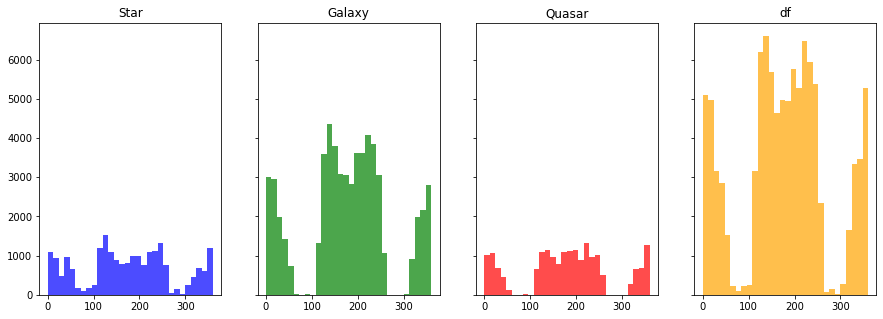

In [45]:
###alpha
class_star = df[df['class'] == 'STAR']
class_galaxy = df[df['class'] == 'GALAXY']
class_quasar = df[df['class'] == 'QSO']

fig, axs = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

axs[0].hist(class_star['alpha'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Star')

axs[1].hist(class_galaxy['alpha'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Galaxy')

axs[2].hist(class_quasar['alpha'], bins=30, color='red', alpha=0.7)
axs[2].set_title('Quasar')

axs[3].hist(df['alpha'], bins=30, color='orange', alpha=0.7)
axs[3].set_title('df')

plt.show()

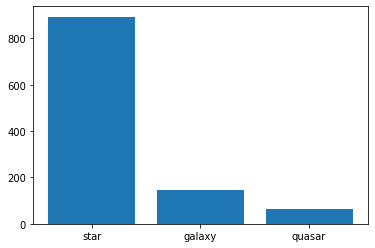

In [66]:
k = df[((df['alpha'] > 60) & (df['alpha'] < 100)) | ((df['alpha'] > 260) & (df['alpha'] < 300))]
star = k[k['class'] == 'STAR']
galaxy = k[k['class'] == 'GALAXY']
quasar = k[k['class'] == 'QSO']

rows = [len(star), len(galaxy), len(quasar)]
names = ['star', 'galaxy', 'quasar']

plt.bar(names, rows)
plt.show()

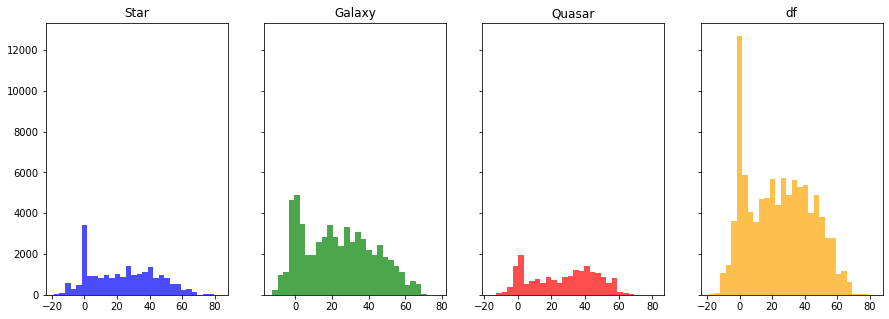

In [44]:
###delta
class_star = df[df['class'] == 'STAR']
class_galaxy = df[df['class'] == 'GALAXY']
class_quasar = df[df['class'] == 'QSO']

fig, axs = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

axs[0].hist(class_star['delta'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Star')

axs[1].hist(class_galaxy['delta'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Galaxy')

axs[2].hist(class_quasar['delta'], bins=30, color='red', alpha=0.7)
axs[2].set_title('Quasar')

axs[3].hist(df['delta'], bins=30, color='orange', alpha=0.7)
axs[3].set_title('df')

plt.show()

zmienna delta przypomina rozkład normalny

<AxesSubplot: xlabel='alpha', ylabel='delta'>

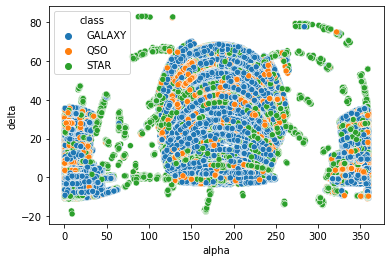

In [59]:
sns.scatterplot(x = df.alpha, y = df.delta, data = df, hue = 'class')
#zależnośc między alfa i delta

## filters

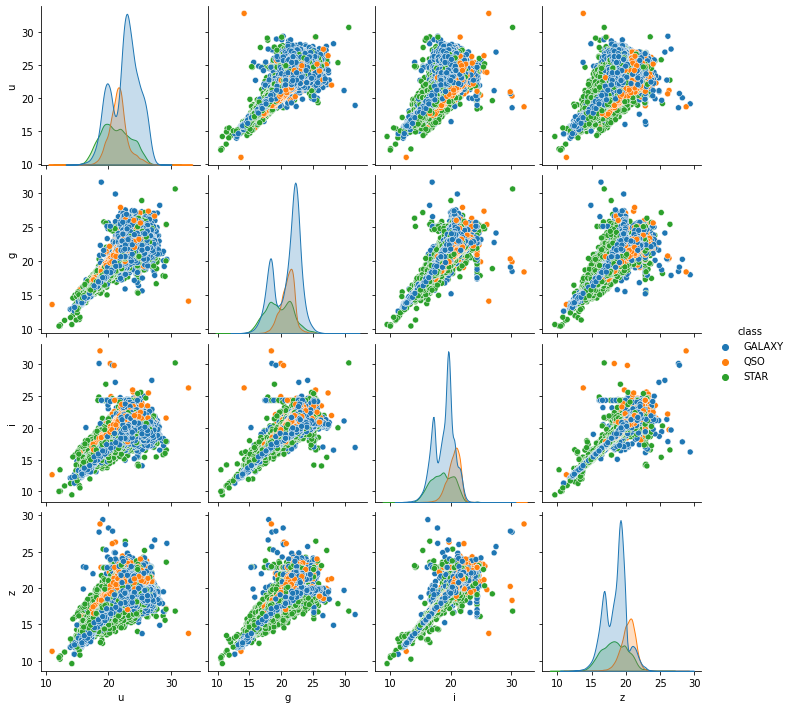

In [110]:
g = sns.pairplot(data=df[['u', 'g', 'i', 'z', 'class']],
                 hue='class')
plt.show()